In [1]:
import sys
sys.path.append("../")
DATA_PATH = "../data/"
SAVE_PATH = "../plots"

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import py_common.utility as utility
from py_common.units import *
from py_common.scattering_dependence import *
from py_common.bounds_dependence import *
from py_common.wave_function import *
from matplotlib.collections import LineCollection
import itertools

# plt.rcParams.update({'font.size': 18})

# Potential surface

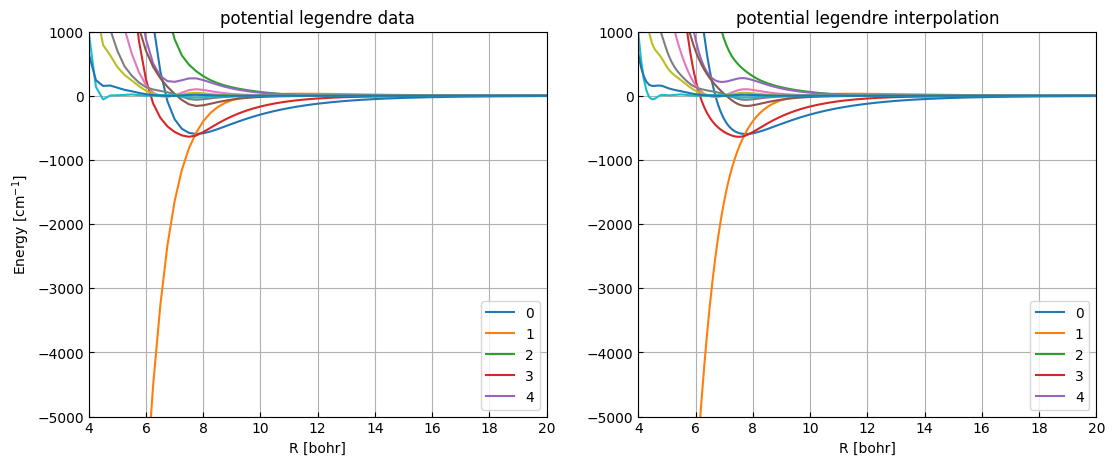

In [6]:
files = [
    "potential_dec_data.dat",
    "potential_dec_interpolated.dat",
]

titles = [
    "potential legendre data",
    "potential legendre interpolation",
]

fig, axes = utility.plot_many(1, 2, (13, 5), sharex = True)

for i, ax in enumerate(axes):
    data = utility.load(f"{DATA_PATH}/{files[i]}")
    scalings = data[:, 0]
    values_legendre = data[:, 1:]

    ax.plot(scalings, values_legendre / CMINV)
    ax.legend([str(i) for i in range(5)])
    ax.set_title(titles[i])
    ax.set_xlabel("R [bohr]")

    ax.set_xlim(4, 20)
    ax.set_ylim(-5000, 1000)

axes[0].set_ylabel(r"Energy [cm$^{-1}$]");
    

(0.0, 3.141592653589793)

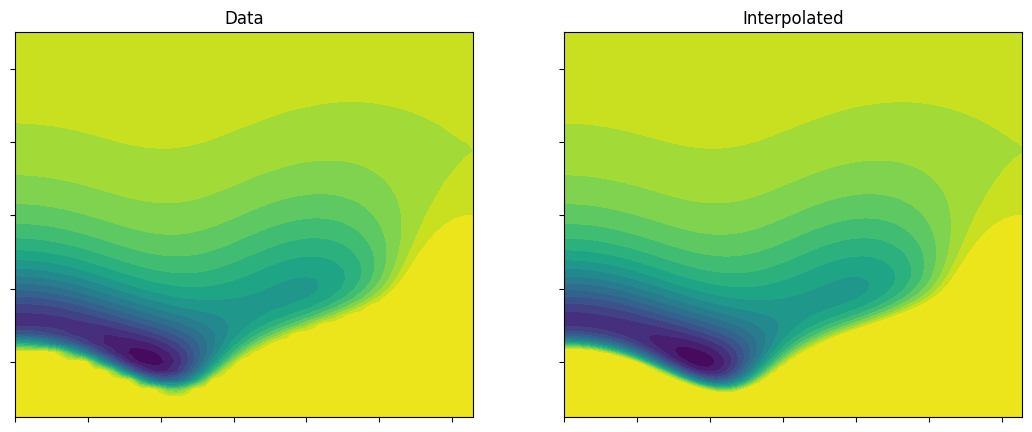

In [ ]:
potential = utility.load(f"{DATA_PATH}/potential_dec_data.dat")
r = potential[:, 0]
potential = potential[:, 1:] / CMINV

fig, axes = plt.subplots(1, 2, figsize = (13, 5))

_, ax = utility.plot_surface(r, potential, fig_ax = (fig, axes[0]), add_0 = False, levels = 20)
ax.set_title("Data")
ax.set_ylim(4.5, 15)
ax.set_xlim(0, np.pi)

potential = utility.load(f"{DATA_PATH}/potential_dec_interpolated.dat")
r = potential[:, 0]
potential = potential[:, 1:] / CMINV

_, ax = utility.plot_surface(r, potential, fig_ax = (fig, axes[1]), add_0 = False, levels = 20)
ax.set_title("Interpolated")
ax.set_ylim(4.5, 15)
ax.set_xlim(0, np.pi);

# Anisotropic hyperfine

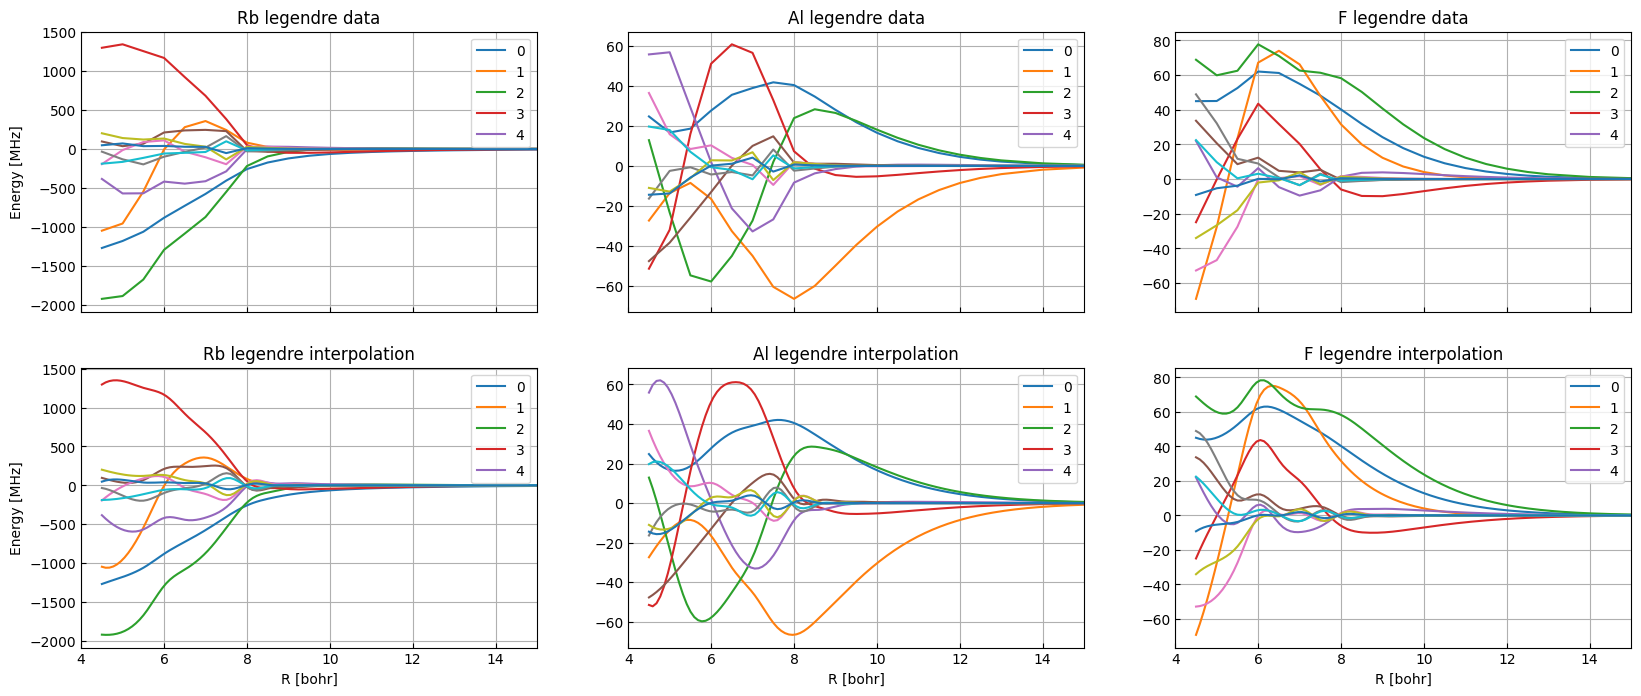

In [52]:
files = [
    "aniso_hifi_Rb_data.dat",
    "aniso_hifi_Al_data.dat",
    "aniso_hifi_F_data.dat",
    "aniso_hifi_Rb_interpolated.dat",
    "aniso_hifi_Al_interpolated.dat",
    "aniso_hifi_F_interpolated.dat",
]

titles = [
    "Rb legendre data",
    "Al legendre data",
    "F legendre data",
    "Rb legendre interpolation",
    "Al legendre interpolation",
    "F legendre interpolation",
]

fig, axes = utility.plot_many(2, 3, (20, 8), sharex = True)

for i, ax in enumerate(axes):
    data = utility.load(f"{DATA_PATH}/{files[i]}")
    scalings = data[:, 0]
    values_legendre = data[:, 1:] / MHZ

    ax.plot(scalings, values_legendre)
    ax.legend([str(i) for i in range(5)])
    ax.set_title(titles[i])

    ax.set_xlim(4, 15)
    # ax.set_ylim(-5000, 1000)

axes[0, 0].set_ylabel("Energy [MHz]")
axes[1, 0].set_ylabel("Energy [MHz]")

axes[1, 0].set_xlabel("R [bohr]")
axes[1, 1].set_xlabel("R [bohr]")
axes[1, 2].set_xlabel("R [bohr]");

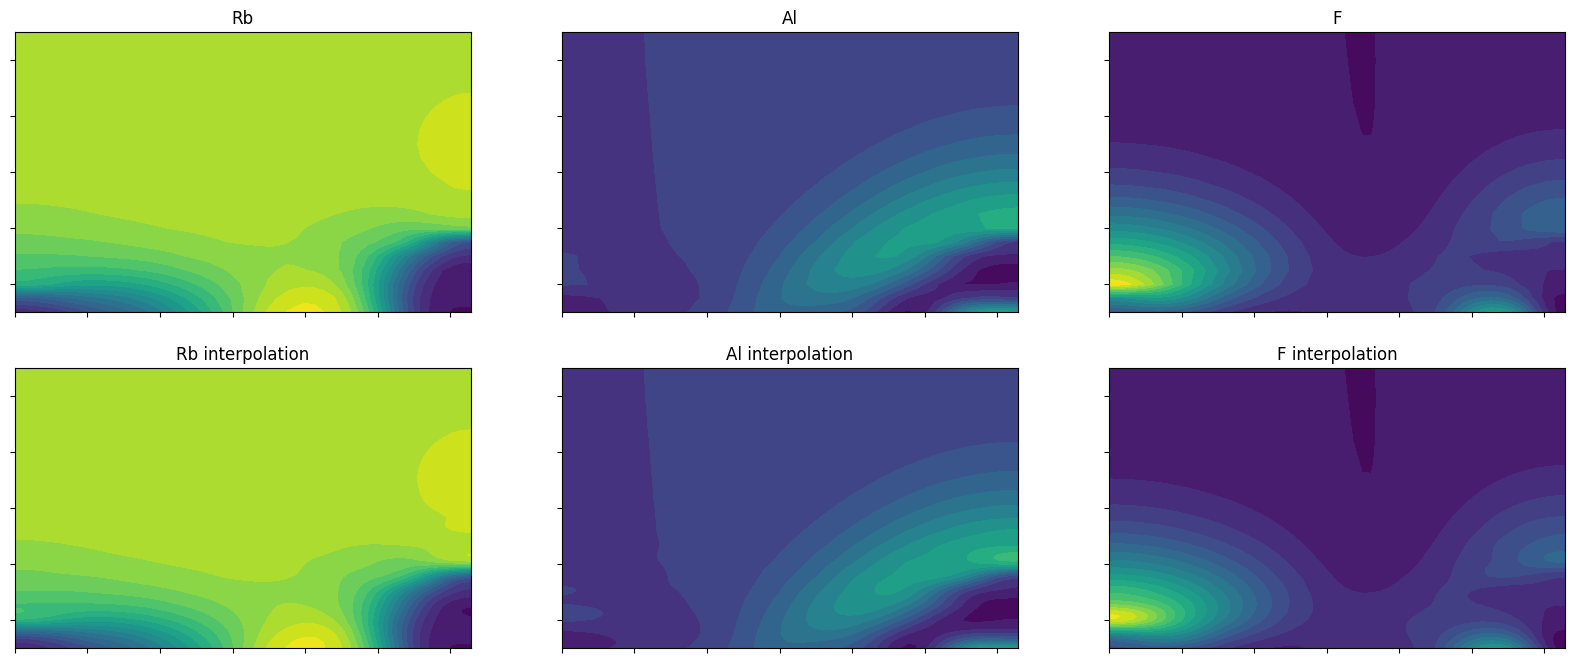

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (20, 8))
axes = utility.AxesArray(axes, 2, 3)

files = [
    "aniso_hifi_Rb_data.dat",
    "aniso_hifi_Al_data.dat",
    "aniso_hifi_F_data.dat",
    "aniso_hifi_Rb_interpolated.dat",
    "aniso_hifi_Al_interpolated.dat",
    "aniso_hifi_F_interpolated.dat",
]

titles = [
    "Rb",
    "Al",
    "F",
    "Rb interpolation",
    "Al interpolation",
    "F interpolation",
]

for i, ax in enumerate(axes):
    potential = utility.load(f"{DATA_PATH}/{files[i]}")
    r = potential[:, 0]
    potential = potential[:, 1:] * 1000 / KELVIN

    utility.plot_surface(r, potential, fig_ax = (fig, ax), add_0 = False, levels = 20)
    ax.set_title(titles[i])

    ax.set_ylim(5, 15)
    ax.set_xlim(0, np.pi)


# Scattering calculations

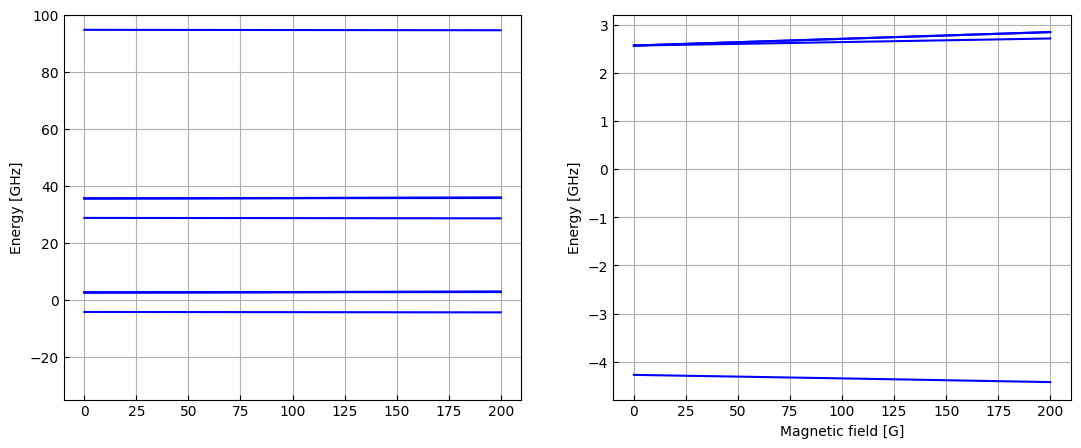

In [10]:
fig, axes = utility.plot_many(1, 2, (13, 5), sharex = True)

data = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_10.dat")
axes[0].plot(data[:, 0], data[:, 1:], color = "blue")
axes[0].set_ylabel("Energy [GHz]")
axes[0].set_ylim(-35, 100)

data = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_0.dat")
axes[1].plot(data[:, 0], data[:, 1:], color = "blue")
axes[1].set_ylabel("Energy [GHz]")

axes[1].set_xlabel("Magnetic field [G]");

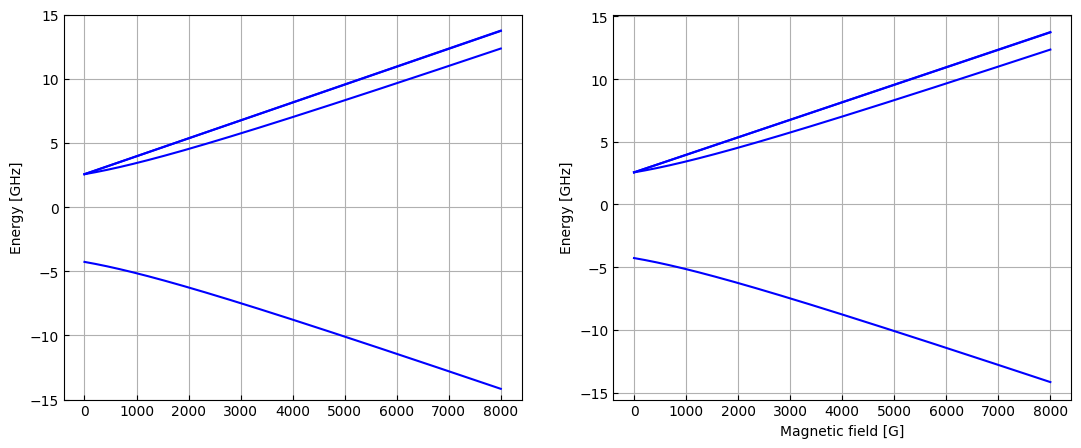

In [9]:
fig, axes = utility.plot_many(1, 2, (13, 5), sharex = True)

data = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_10_far.dat")
axes[0].plot(data[:, 0], data[:, 1:], color = "blue")
axes[0].set_ylabel("Energy [GHz]")
axes[0].set_ylim(-15, 15)

data = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_0_far.dat")
axes[1].plot(data[:, 0], data[:, 1:], color = "blue")
axes[1].set_ylabel("Energy [GHz]")

axes[1].set_xlabel("Magnetic field [G]");

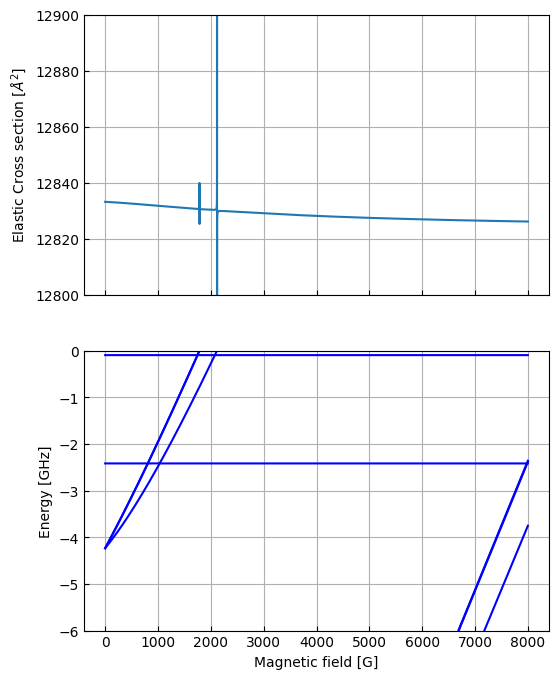

In [39]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_0.json")
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_0.json")

fig, axes = utility.plot_many(2, 1, (6, 8), sharex=True)

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[0].plot(points, cross_section / ANGS**2)

axes[0].set_ylim(12800, 12900)
axes[0].set_ylabel(r"Elastic Cross section [$\AA^2$]");

for state in bounds_single.states():
	axes[1].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[1].set_ylabel(f"Energy [GHz]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-6, 0);

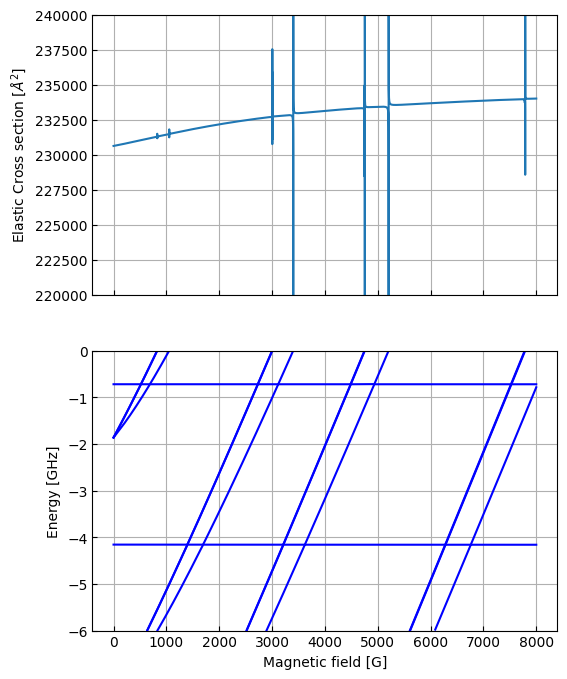

In [41]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_10.json")
bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_10.json")

fig, axes = utility.plot_many(2, 1, (6, 8), sharex=True)

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[0].plot(points, cross_section / ANGS**2)

axes[0].set_ylim(220000, 240000)
axes[0].set_ylabel(r"Elastic Cross section [$\AA^2$]")

for state in bounds_single.states():
	axes[1].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[1].set_ylabel(f"Energy [GHz]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-6, 0);

# Convergences

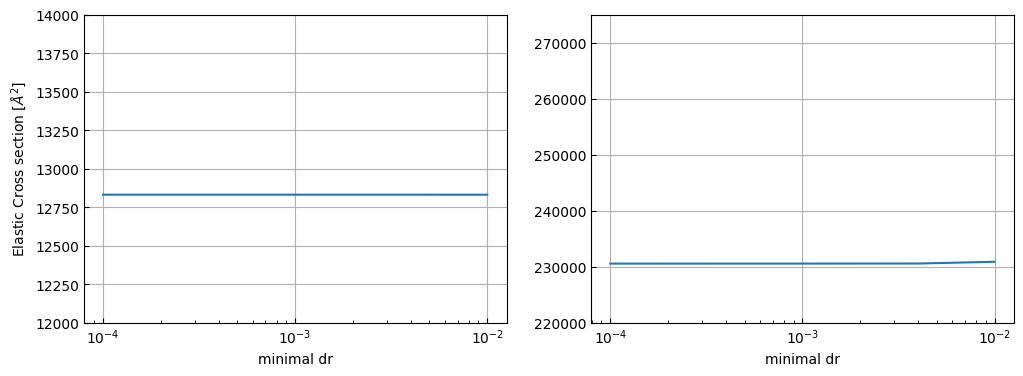

In [25]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_0_convergence_dr.json")

fig, axes = utility.plot_many(1, 2, (12, 4), sharex=True)

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[0].plot(points, cross_section / ANGS**2)

axes[0].set_ylim(12000, 14000)
axes[0].set_ylabel(r"Elastic Cross section [$\AA^2$]")
axes[0].set_xlabel("minimal dr")

data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_10_convergence_dr.json")

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[1].plot(points, cross_section / ANGS**2)

axes[1].set_ylim(220000, 275000)
axes[1].set_xlabel("minimal dr")

axes[0].set_xscale("log")
axes[1].set_xscale("log");


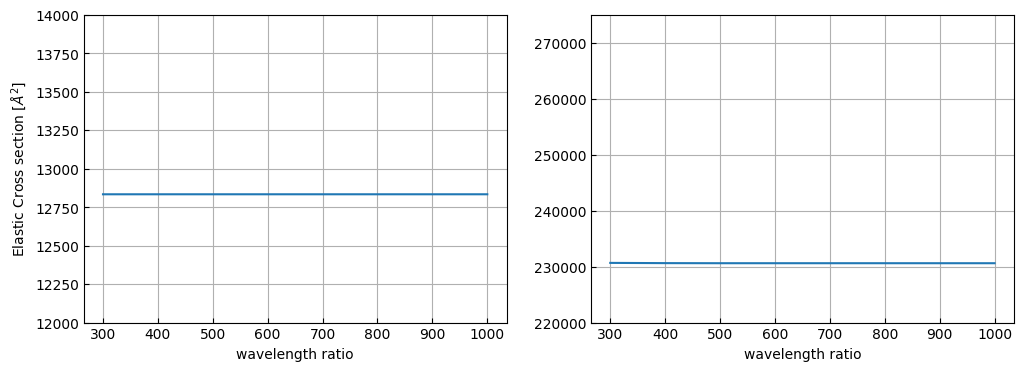

In [23]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_0_convergence_step.json")

fig, axes = utility.plot_many(1, 2, (12, 4), sharex=True)

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[0].plot(points, cross_section / ANGS**2)

axes[0].set_ylim(12000, 14000)
axes[0].set_ylabel(r"Elastic Cross section [$\AA^2$]")
axes[0].set_xlabel("wavelength ratio")

data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_10_convergence_step.json")

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[1].plot(points, cross_section / ANGS**2)

axes[1].set_ylim(220000, 275000)
axes[1].set_xlabel("wavelength ratio");


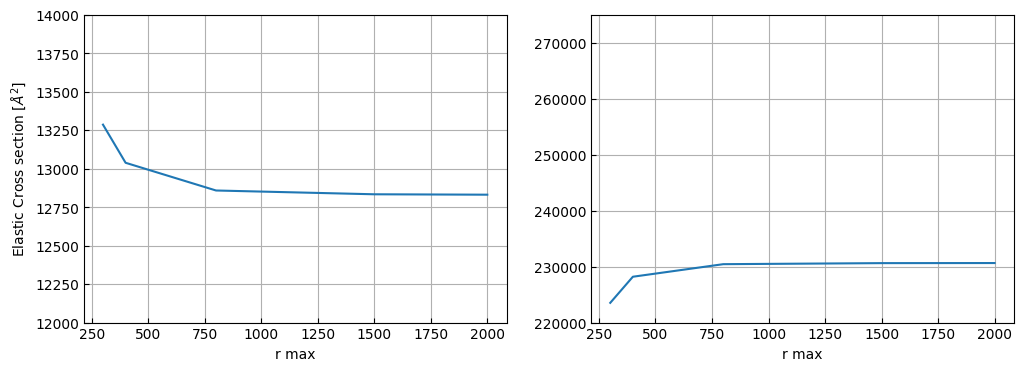

In [17]:
data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_0_convergence_distance.json")

fig, axes = utility.plot_many(1, 2, (12, 4), sharex=True)

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[0].plot(points, cross_section / ANGS**2)

axes[0].set_ylim(12000, 14000)
axes[0].set_ylabel(r"Elastic Cross section [$\AA^2$]")
axes[0].set_xlabel("r max")

data = ScatteringDependence.parse_json(f"{DATA_PATH}/alf_rb_scattering_n_max_10_convergence_distance.json")

points = data.parameters
cross_section = data.elastic_cross_sections()

axes[1].plot(points, cross_section / ANGS**2)

axes[1].set_ylim(220000, 275000)
axes[1].set_xlabel("r max");


# Simple "ABM"

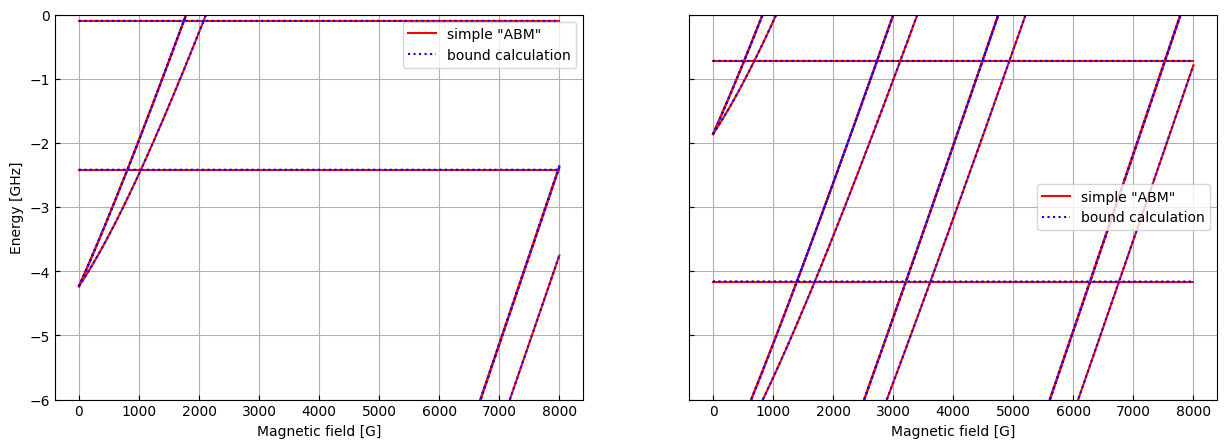

In [7]:
n_maxes = [0, 10]
fig, axes = utility.plot_many(1, 2, shape = (15, 5), sharey = True)

for n_max, ax in zip(n_maxes, axes):
    bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_{n_max}_structureless.json")
    bounds = bounds_single.data[:, -1]
    levels = utility.load(f"{DATA_PATH}/alf_rb_levels_n_max_0_far.dat")
    levels[:, 1:] -= levels[:, 1:2]

    for b in bounds:
        ax.plot(levels[:, 0], levels[:, 1:] + b, color = "red")

    bounds_single = BoundsDependence.parse_json(f"{DATA_PATH}/alf_rb_bound_states_n_max_{n_max}.json")
    for state in bounds_single.states():
        ax.plot(state[:, 0], state[:, 1], color = "blue", linestyle = ":")
        
    ax.set_xlabel("Magnetic field [G]")
    ax.set_ylim(-6, 0)
    ax.legend([ax.lines[0], ax.lines[-1]], ['simple "ABM"', "bound calculation"])
axes[0].set_ylabel(f"Energy [GHz]");